In [1]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
#import xesmf as xe
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import gridspec
import cartopy.mpl.ticker as cticker
import scipy
import scipy.stats
import xesmf as xe

from defs import mmm

In [2]:
folder = 'Data_processed/'
modellist =  ['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A', 'IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3', 'NorESM1-F','HadGEM3']

In [3]:
dsgrid = xr.open_dataset(folder+'1x1grid.nc')
area = dsgrid.area

dsE280 = xr.open_dataset(folder+'MMM_ensemble/E280/SI_100yr.nc')
dsEoi400 = xr.open_dataset(folder+'MMM_ensemble/Eoi400/SI_100yr.nc')

siE280 = mmm(dsE280.si_mean)
siEoi400 = mmm(dsEoi400.si_mean)

allsiE280 = dsE280.si_mean
allsiEoi400 = dsEoi400.si_mean

dsE280 = xr.open_dataset(folder+'MMM_ensemble/E280/sat_100yr.nc')
dsEoi400 = xr.open_dataset(folder+'MMM_ensemble/Eoi400/sat_100yr.nc')
tase = mmm(dsE280.tas)
taseoi = mmm(dsEoi400.tas)

/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62861/1743597432.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap0 = plt.cm.get_cmap("cmo.thermal",6).copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62861/1743597432.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = plt.cm.get_cmap("cmo.ice").copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62861/1743597432.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 

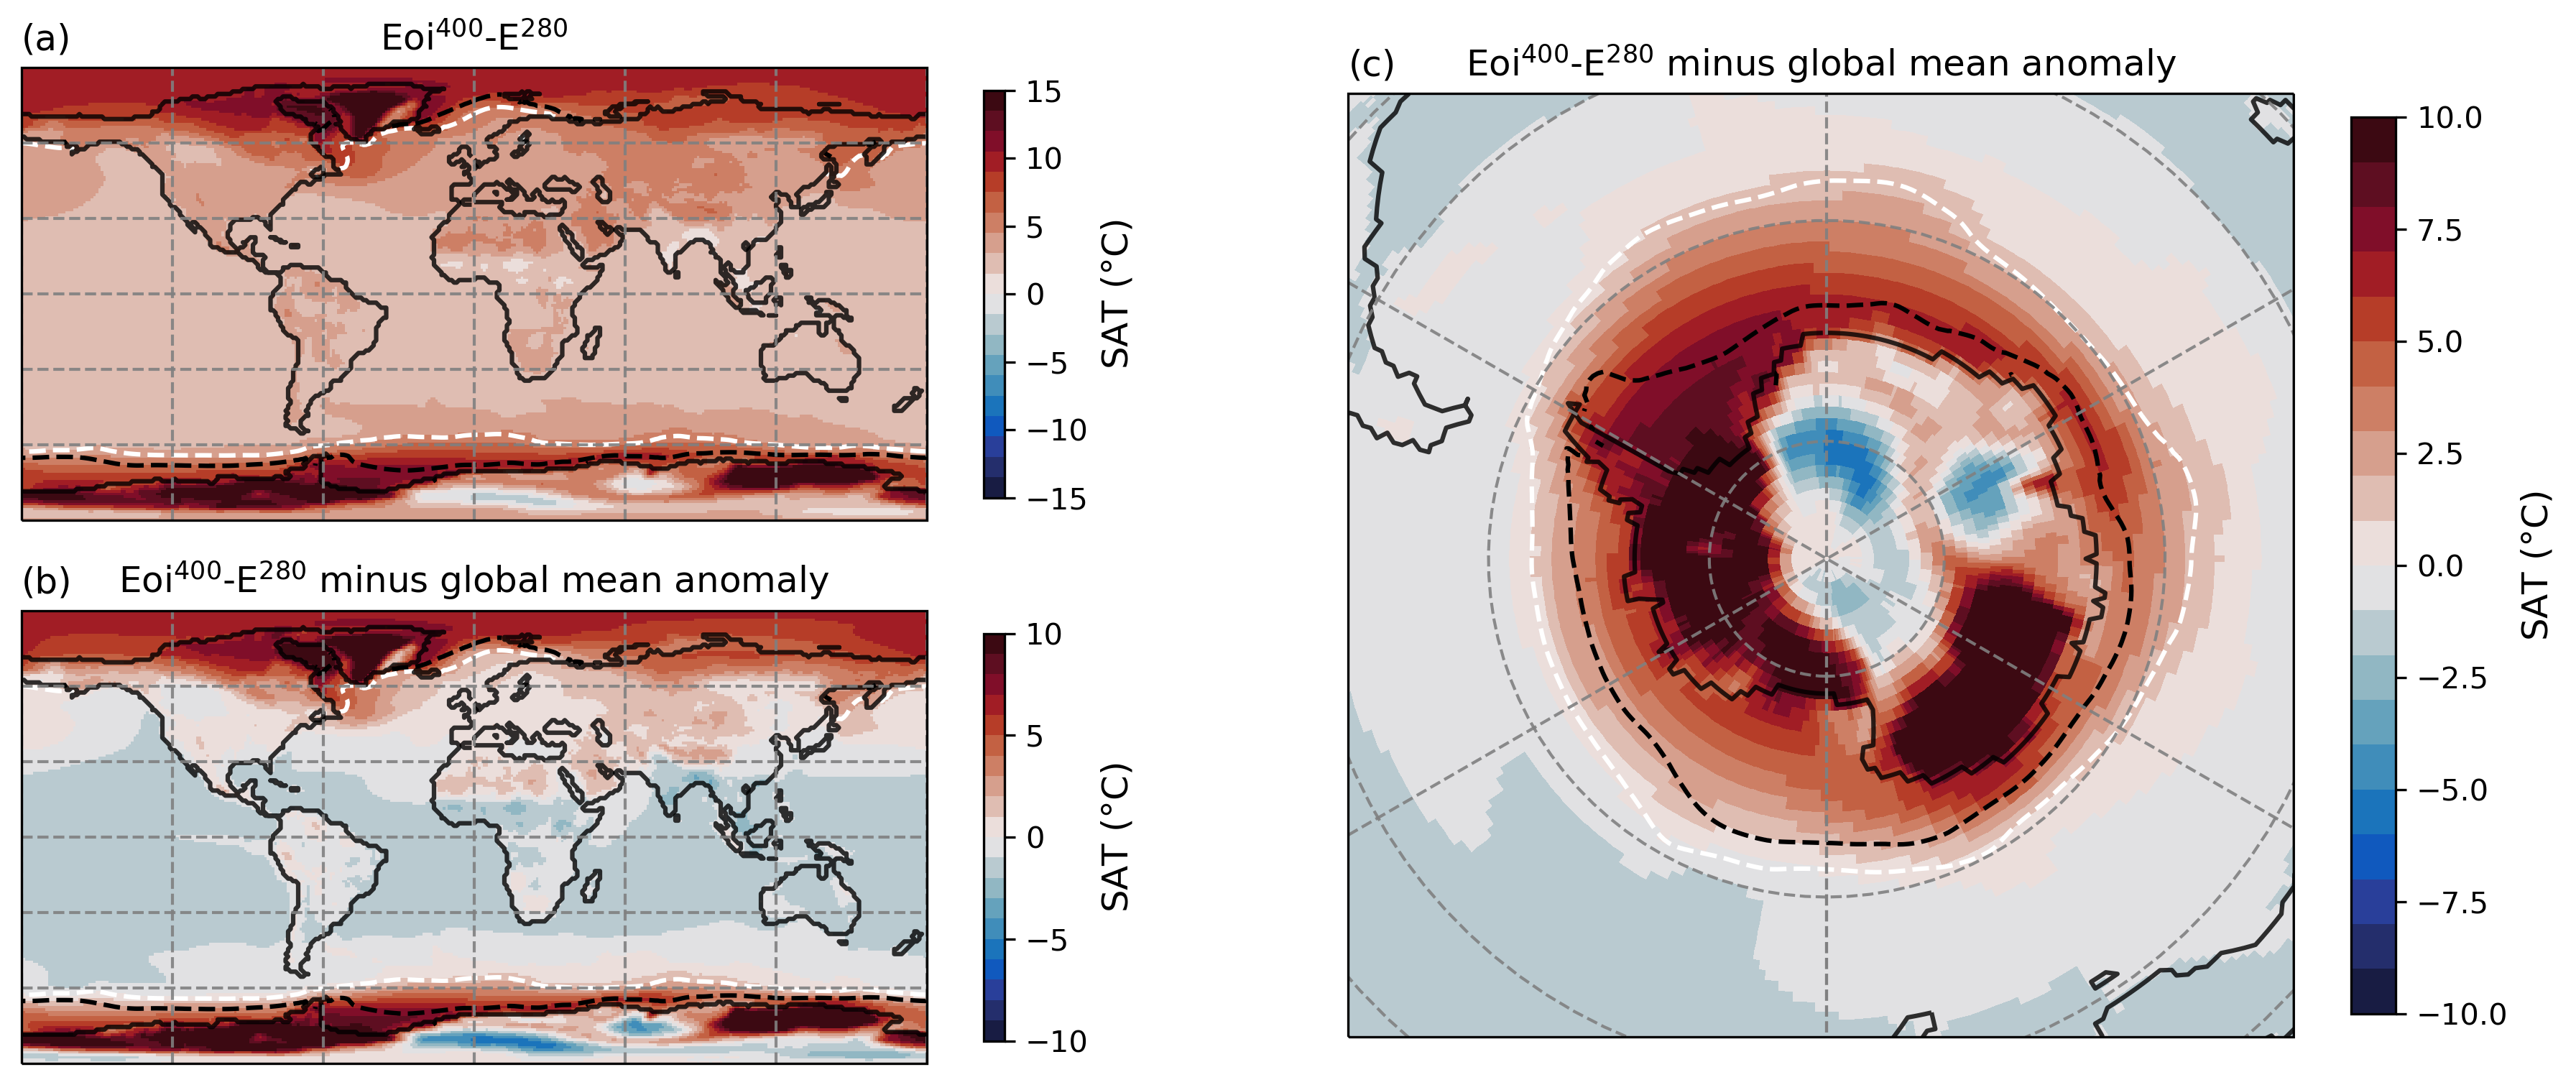

In [4]:
## creeer je figuur:
fig = plt.figure(figsize=(15,6), dpi=300)
## creeer je assen. Ik voeg hier de projectie 'plate carree' toe, Cartopy heeft verschillende, bijv EqualEarth
proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0)

cmap0 = plt.cm.get_cmap("cmo.thermal",6).copy()
cmap0.set_under('lightgrey')

cmap1 = plt.cm.get_cmap("cmo.ice").copy()
cmap1.set_under('lightgrey')

cmap2 = plt.cm.get_cmap("cmo.balance",20).copy()
cmap2.set_under('black')

iceline = 15
spec = fig.add_gridspec(2, 2)

ax = fig.add_subplot(spec[0, 0:1], projection=ccrs.PlateCarree())
im=ax.pcolormesh(dsE280.lon,dsE280.lat,(taseoi-tase), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -15, vmax = 15)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,90], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SAT ($\degree$C)', fontsize=12)
ax.set_title('Eoi$^{400}$-E$^{280}$')
ax.set_title(r'(a)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')


dsat = (taseoi-tase)
ax = fig.add_subplot(spec[1, 0:1], projection=ccrs.PlateCarree())
im=ax.pcolormesh(dsE280.lon,dsE280.lat,(dsat-dsat.weighted(area).mean()), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -10, vmax = 10)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,90], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SAT ($\degree$C)', fontsize=12)
ax.set_title('Eoi$^{400}$-E$^{280}$ minus global mean anomaly')
ax.set_title(r'(b)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax = fig.add_subplot(spec[:, 1:], projection=proj)
im=ax.pcolormesh(dsE280.lon,dsE280.lat,(dsat-dsat.weighted(area).mean()).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -10, vmax = 10)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SAT ($\degree$C)', fontsize=12)
ax.set_title('Eoi$^{400}$-E$^{280}$ minus global mean anomaly')
ax.set_title(r'(c)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

#plt.savefig('SFig2.png', bbox_inches='tight')

plt.show()

In [5]:
#Global SAT anomaly 
dsat = dsEoi400.tas-dsE280.tas
dsatgl = dsat.weighted(area).mean(dim=['lat','lon'])
dsatgl = dsatgl.mean(dim='model').values

print('Global average Eoi400-E280 SAT anomaly is %.1f degC' %dsatgl)

Global average Eoi400-E280 SAT anomaly is 3.4 degC


In [6]:
#South polar amplification SAT
dsatsp = dsat.where(dsat.lat<=-60).weighted(area).mean(dim=['lat','lon']).mean(dim='model')

print('South polar region average Eoi400-E280 SAT anomaly is %.1f degC' %dsatsp)
print('South polar amplification is %.1f' %(dsatsp/dsatgl))

South polar region average Eoi400-E280 SAT anomaly is 7.6 degC
South polar amplification is 2.2
